Content:

   -Business case
   
   1.Exploring data
   
   2.Analyzing data with visualization
   
   3.Adjusting data[converting categorical features into numerical/ drop unnecessary columns]
   
   4.Split the data to features and target
   
   5.Cross Validation to choose the model
   
   6.Hyper Parameter Tuning to know best parameters
   
   7.Main conclusions and recommendations
   

### This dataset contains an airline passenger satisfaction survey where passengers rate the flight experience on a scale of 1 to 5. We need to predict whether the passenger is satisfied or Unsatisfied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DF=pd.read_csv('C:/Users/dell/Desktop/Data Science Diploma/final project/Passenger satisfaction.csv')

# 1. Exploring data

In [3]:
DF.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [4]:
DF.shape

(103904, 25)

In [5]:
DF.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
DF.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [7]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


### Average delay in flights is 15 mins and 50% of the flights have no delay

# 2. Analyzing data 

In [8]:
DF['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

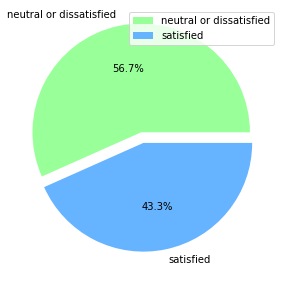

In [9]:
explode=(0.1,0)
fig1,ax1=plt.subplots(figsize=(10,5))
colors1=['#99ff99','#66b3ff']
ax1.pie(DF['satisfaction'].value_counts(), explode=explode, labels=DF['satisfaction'].unique(),colors=colors1,autopct='%1.1f%%')
plt.legend()
plt.show() 

### 56.7% of passengers are dissatisfied/neutral

In [10]:
DF['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

### The number of the Male and female passengers are  almost the same, and the satisfaction rate as well

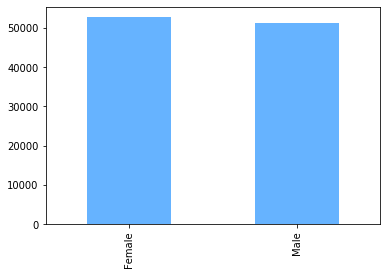

In [11]:
color2=['#66b3ff','#66b3ff']
DF['Gender'].value_counts().plot(kind='bar',color=color2)

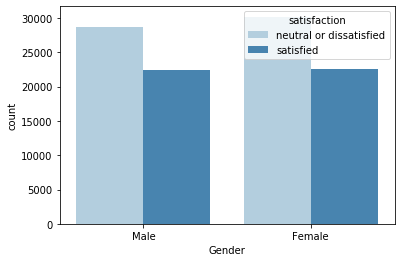

In [12]:
sns.countplot(data=DF,x='Gender',hue='satisfaction',palette='Blues')

In [13]:
DF['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

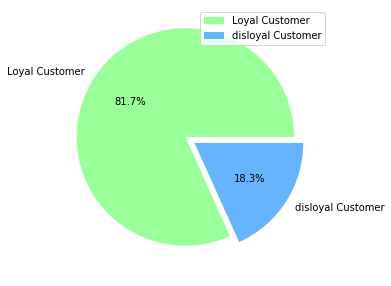

In [14]:
explode=(0.1,0)
fig1,ax1=plt.subplots(figsize=(10,5))
colors3=['#99ff99','#66b3ff']
ax1.pie(DF['Customer Type'].value_counts(), explode=explode, labels=DF['Customer Type'].unique(),autopct='%1.1f%%',colors=colors3)
plt.legend()
plt.show()

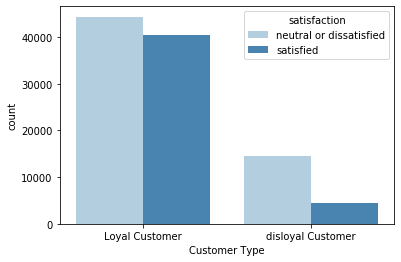

In [15]:
sns.countplot(data=DF,x='Customer Type',hue='satisfaction',palette='Blues')

## 81.7% of passengers are loyal and the majority of them are dissatisfied

In [16]:
DF['Type of Travel'].value_counts() / DF['Type of Travel'].shape[0]*100

Business travel    68.962696
Personal Travel    31.037304
Name: Type of Travel, dtype: float64

In [17]:
DF['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

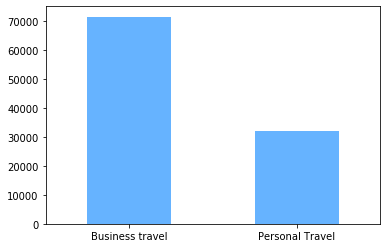

In [18]:
DF['Type of Travel'].value_counts().plot(kind='bar',color=color2)
plt.xticks(rotation=360)

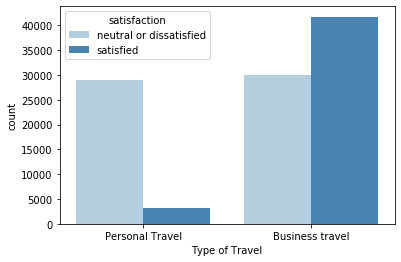

In [19]:
sns.countplot(data=DF,x='Type of Travel',hue='satisfaction', palette='Blues')

## 69% of passengers are traveling for business reasons and the majority of them are satisfied
## while the majority of passengers who are traveling for personal reasons are dissatisfied

In [20]:
DF['Class'].value_counts()/DF['Class'].shape[0]*100

Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: Class, dtype: float64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

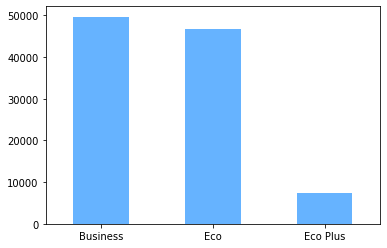

In [21]:
DF['Class'].value_counts().plot(kind='bar',color=color2)
plt.xticks(rotation=360)

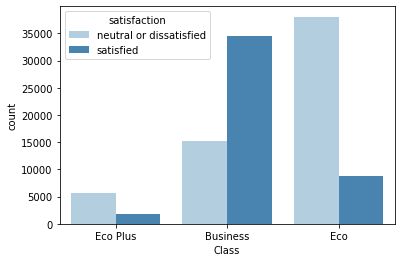

In [22]:
sns.countplot(data=DF,x='Class',hue='satisfaction',palette='Blues')


## 48% of passengers are in business class and majority of them are satisfied
## while 45% are economy and majority are dissatisfied

## Since there are ratings 0  within some features in the survey, I will replace the 0 rating with 3 =>neutral/indifferent

In [23]:
DF[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
     'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
     'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']]=DF[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
     'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
     'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']].replace(0,3)

In [24]:
survey_features=['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']


In [25]:
def illustrativegraphs(a,b):
    for y in survey_features[a:b] :
        plt.figure(figsize(15,5))
        plt.subplot(1,2,1)
        sns.countplot(x=DF[y],palette="Pastel2")
        
        plt.subplot(1,2,2)
        sns.countplot(x=DF[y],hue=DF['satisfaction'],palette='Blues')
        plt.show()

In [26]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### The majority of the passengers rated the wifi service, ease of online booking with 3 and 2 and most of these passengers are dissatisfied 
### The departure/arrival time convenient rating doesn't really affect satisfaction decision[people who rated it with 4 and 5 are dissatisfied].
### The majority of people who rated gate location are indifferent/neutral and most of them still dissatisfied except for people who rated 5

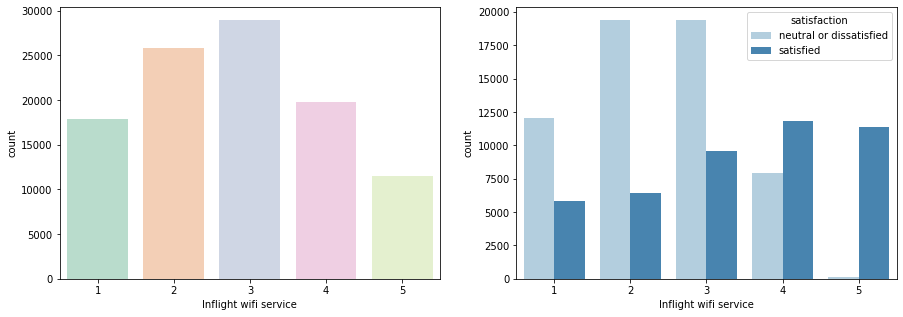

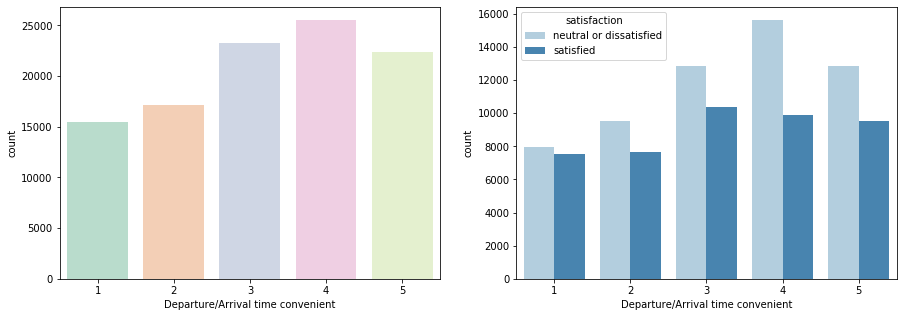

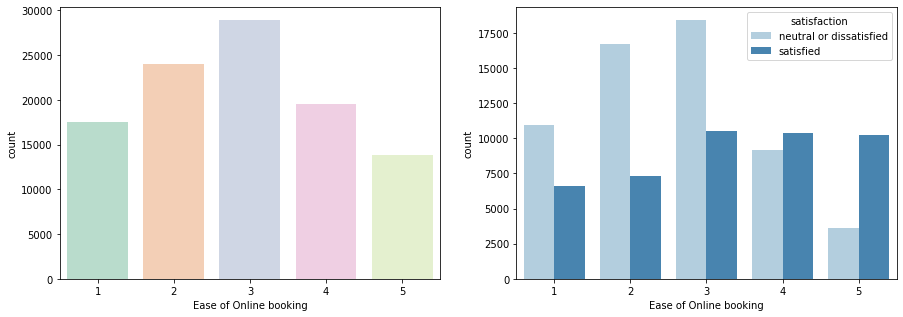

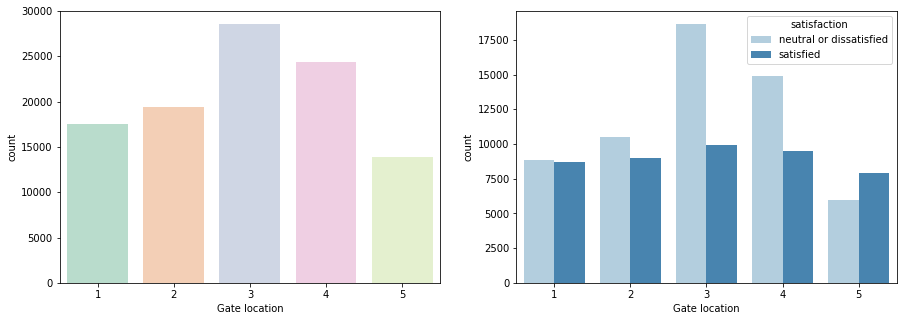

In [27]:
illustrativegraphs(0,4)

### Most of passengers gave  the food & drink rate  4 and majority of these passengers are satisfied and the ones who rated it 3 or less are dissatisfied . Same goes for online boarding, seat comfort and inflight entertainment


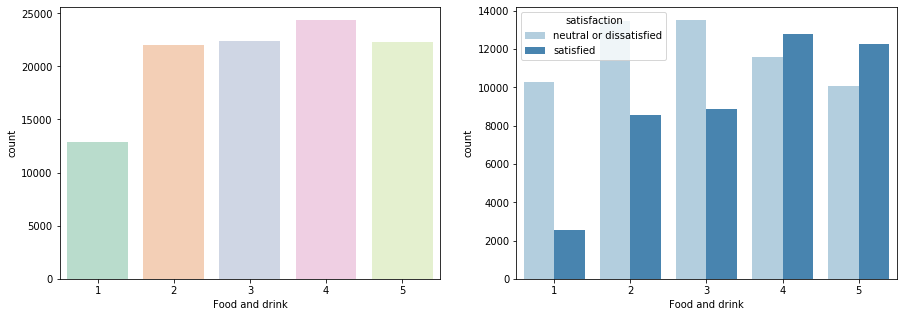

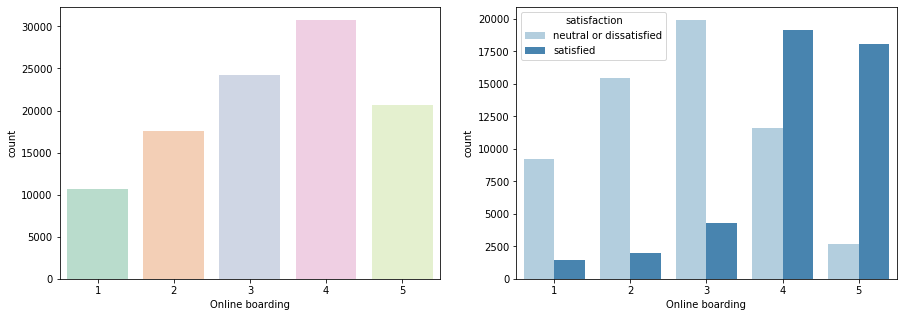

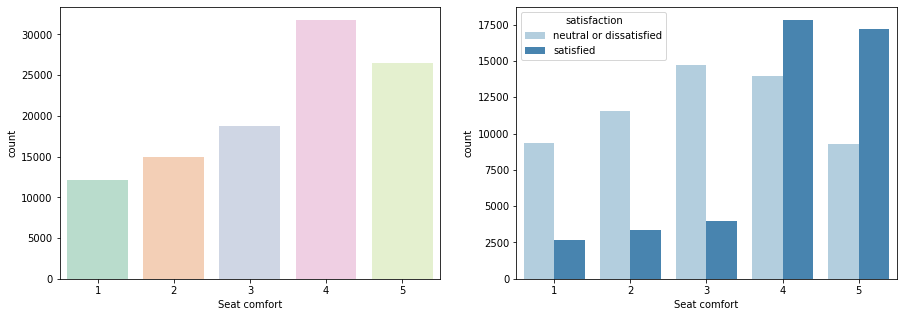

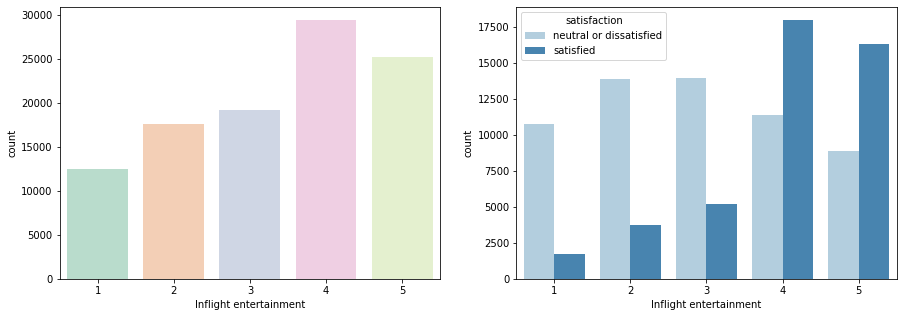

In [28]:
illustrativegraphs(4,8)

### Most of passengers rated the onboard service with 4, and they are satisfied and the ones who rated it 3 or less are dissatisfied . Same goes for leg room service and cleanliness

### for checkin service, baggage handling and inflight service most of passengers who gave rating 4 or less are dissatisfied

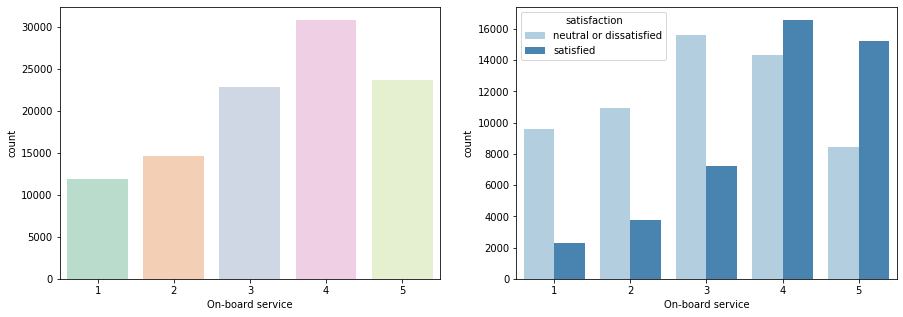

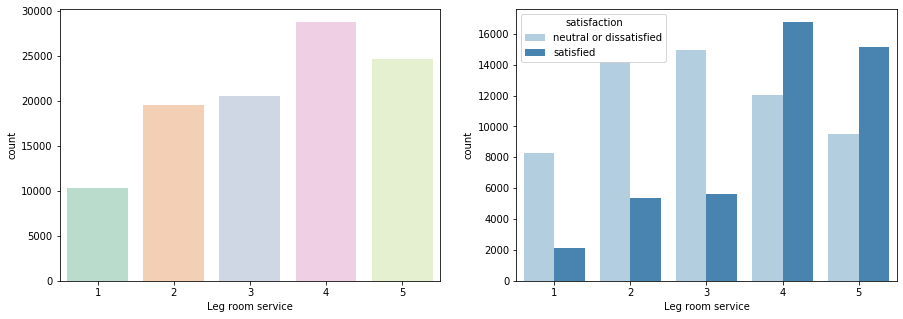

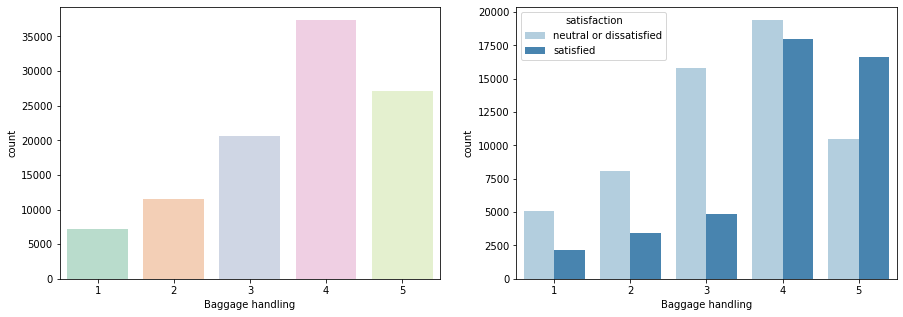

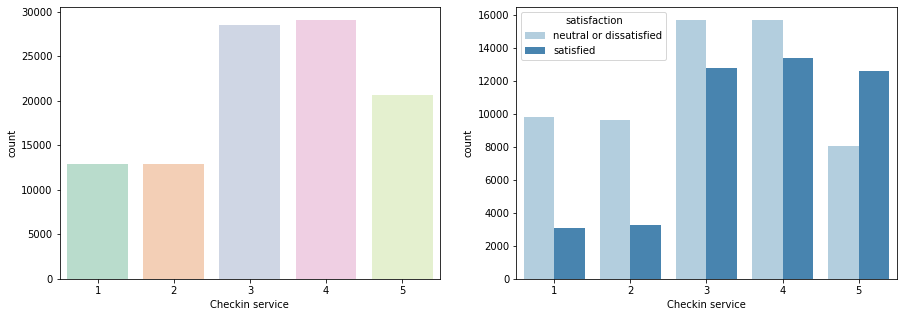

In [29]:
illustrativegraphs(8,12)

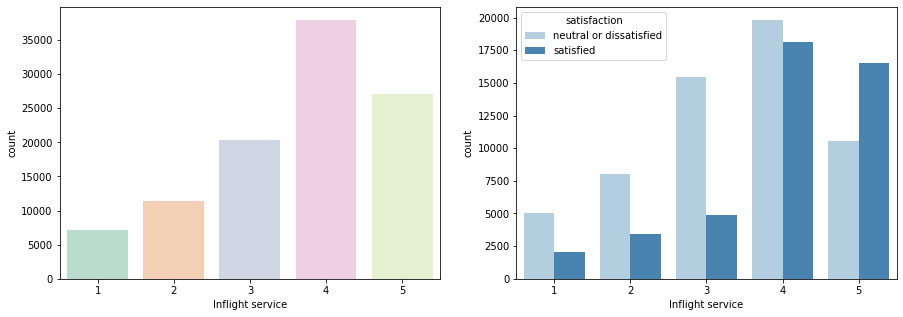

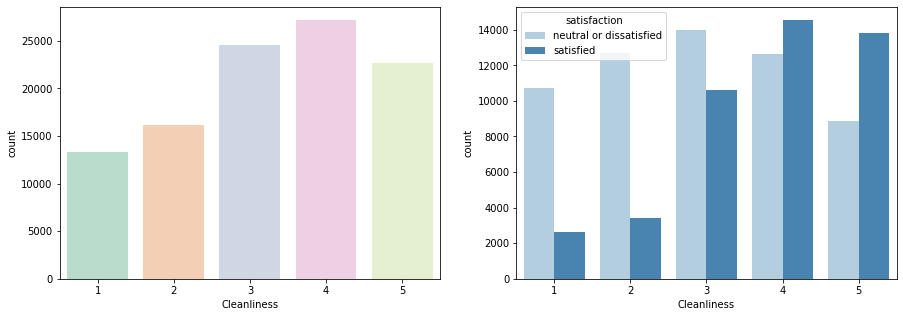

In [30]:
illustrativegraphs(12,14)

### Passengers from business class have given higher ratings for all the services provided, compared to Eco and Eco plus.

### Most of passengers who gave wifi service ratings 4 and 5 are business class, while most of the passengers who gave ratings 3 and 2 are from economy class .


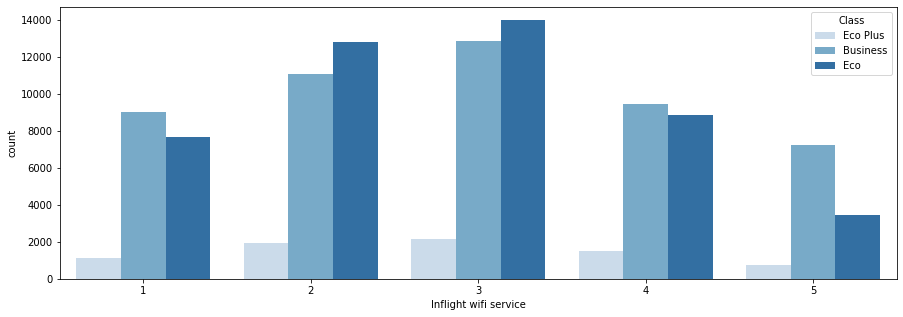

In [31]:
sns.countplot(data=DF,x='Inflight wifi service',hue='Class',palette='Blues')
figsize(15,5)

### Most of the passengers who gave online boarding ratings 4 and 5 are business class , while most of  passengers who gave  it rating 3 or less are in economy class.

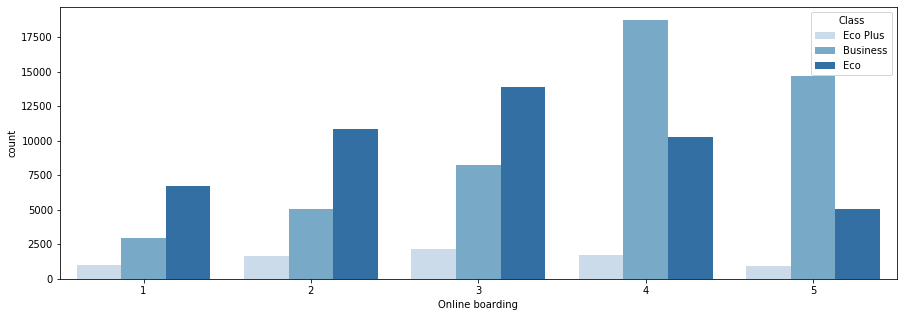

In [32]:
sns.countplot(data=DF,x='Online boarding',hue='Class',palette='Blues')
figsize(15,5)

### Passengers in business class gave higher ratings than economy class passengers  for ease of online booking

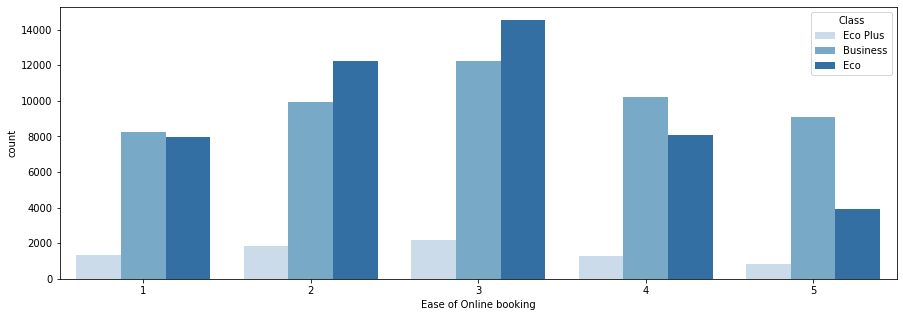

In [33]:
sns.countplot(data=DF,x='Ease of Online booking',hue='Class',palette='Blues')
figsize(15,5)

### The gate location does not seem to be the problem with the Economy class 

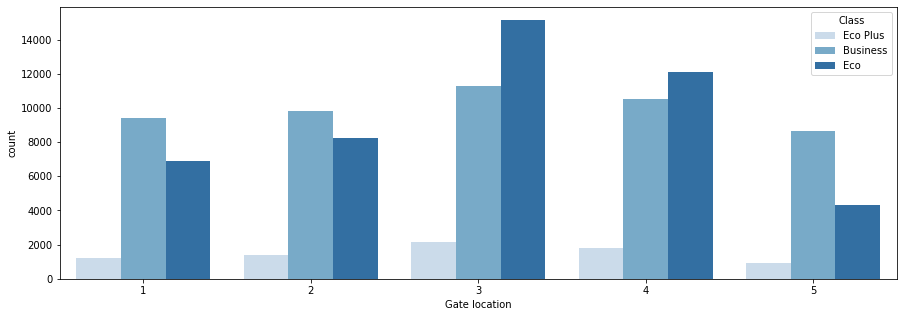

In [34]:
sns.countplot(data=DF,x='Gate location',hue='Class',palette='Blues')
figsize(15,5)

### Majority of  passengers who gave food and drink rating 4 and 5  are business class
### But we can see that food and drink may not be the main problem for economy class 

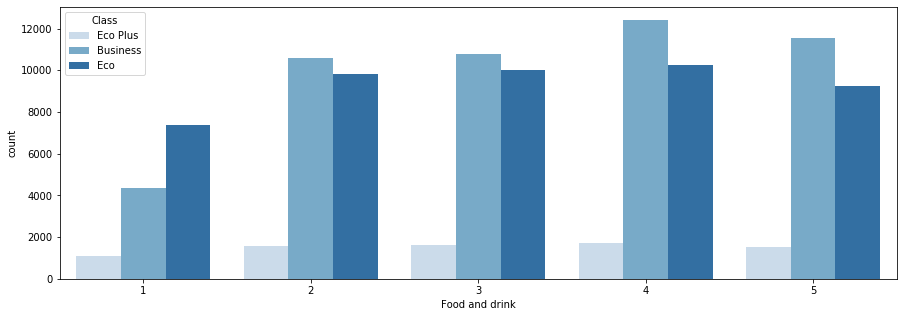

In [35]:
sns.countplot(data=DF,x='Food and drink',hue='Class',palette='Blues')
figsize(15,5)

### Business class passengers gave seat comfort higher ratings than economy class passengers 
#### It is obvious seat comfort affect satisfaction

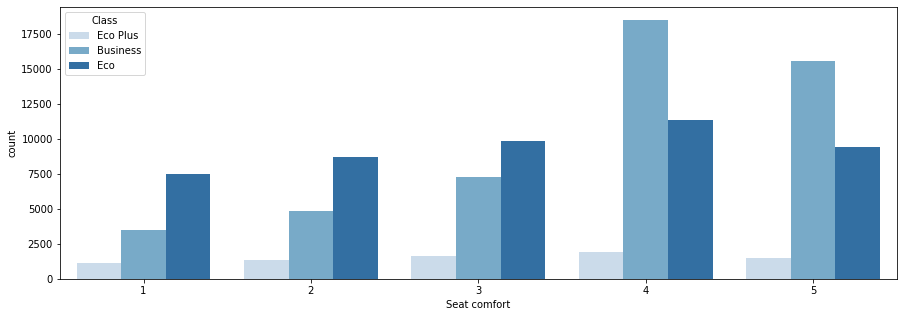

In [36]:
sns.countplot(data=DF,x='Seat comfort',hue='Class',palette='Blues')
figsize(15,5)

### Majority of passengers who gave inflight entertainment rating 4 and 5 are from business class 

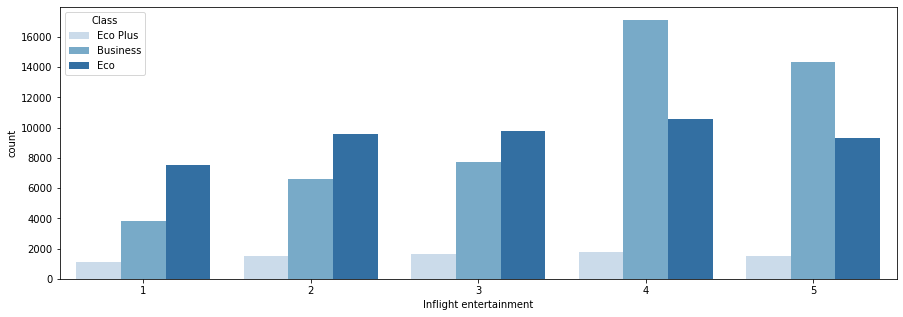

In [37]:
sns.countplot(data=DF,x='Inflight entertainment',hue='Class',palette='Blues')
figsize(15,5)

### Majority of passengers who gave onboard service rating 4 and 5 are from business class 

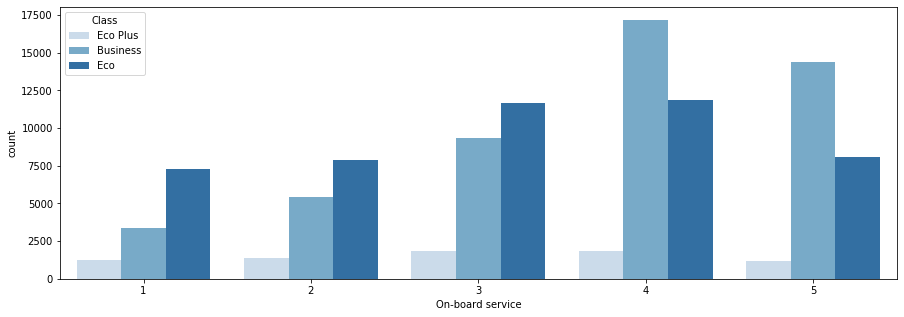

In [38]:
sns.countplot(data=DF,x='On-board service',hue='Class',palette='Blues')
figsize(15,5)

### Majority of passengers who gave Leg room service rating 4 and 5 are from business class 

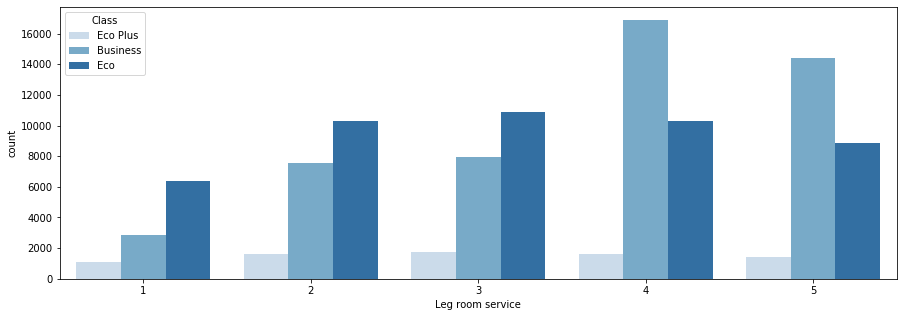

In [39]:
sns.countplot(data=DF,x='Leg room service',hue='Class',palette='Blues')
figsize(15,5)

### It seems that business class passengers are the ones who are more dissatisfied with the departure arrival time convenient

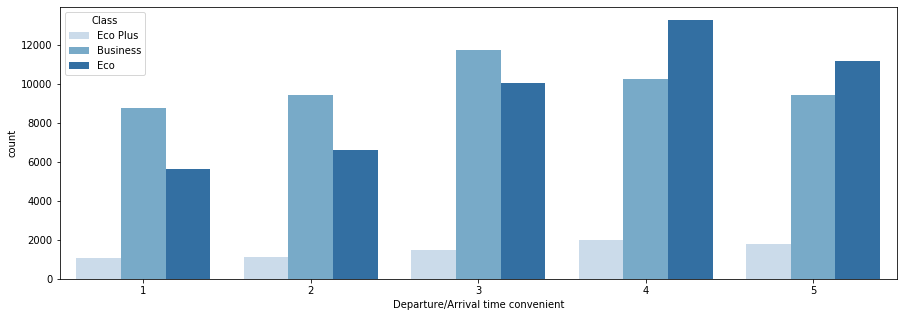

In [40]:
sns.countplot(data=DF,x='Departure/Arrival time convenient',hue='Class',palette='Blues')
figsize(15,5)

### Majority of passengers who gave cleanliness rating 4 and 5 are from business class 

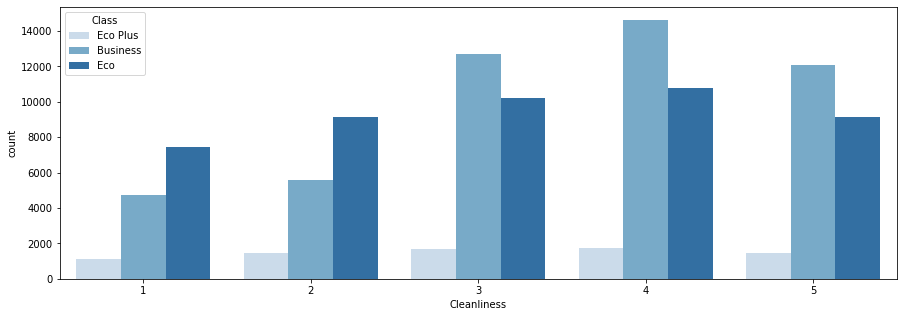

In [41]:
sns.countplot(data=DF,x='Cleanliness',hue='Class',palette='Blues')
figsize(15,5)

### Majority of passengers who gave Baggage handling rating 5 are from business class 

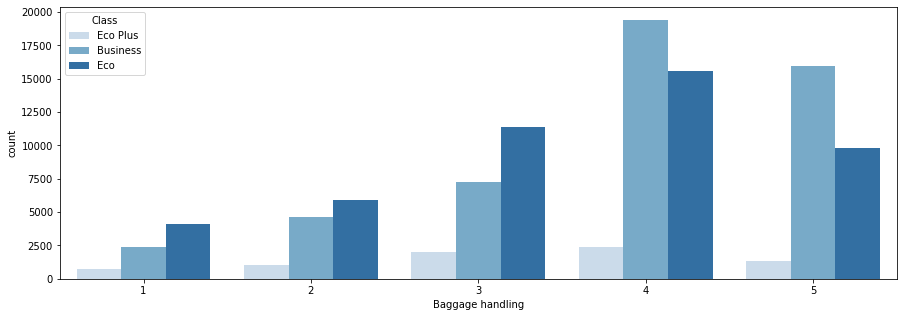

In [42]:
sns.countplot(data=DF,x='Baggage handling',hue='Class',palette='Blues')
figsize(15,5)

### Majority of passengers who gave inflight service rating 4 & 5 are from business class 

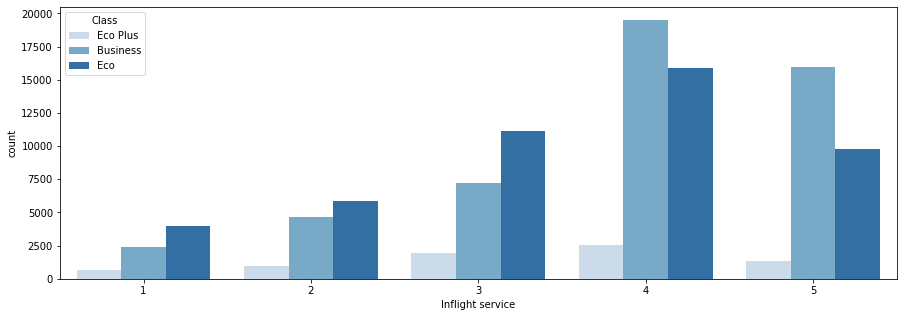

In [43]:
sns.countplot(data=DF,x='Inflight service',hue='Class',palette='Blues')
figsize(15,5)

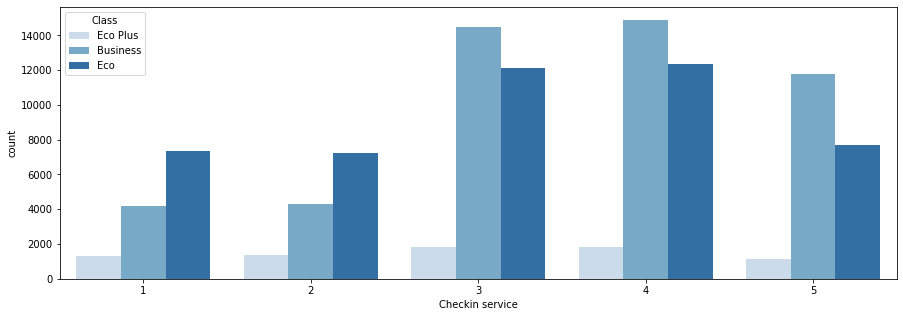

In [44]:
sns.countplot(data=DF,x='Checkin service',hue='Class',palette='Blues')
figsize(15,5)

### Inflight service,seat comfort, baggage handling does not seem to be the problem with passengers who are traveling for personal reasons  because most of them gave ratings 4 and 5 for these features, Unlike the online boarding, ease of online booking, and  inflight wifi-service where most of  passengers who are traveling for personal purpose gave rating 3 or less.

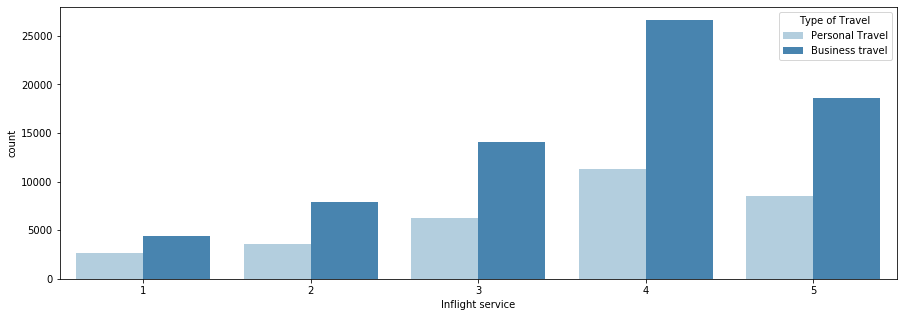

In [49]:
sns.countplot(data=DF,x='Inflight service',hue='Type of Travel',palette='Blues')
figsize(15,5)

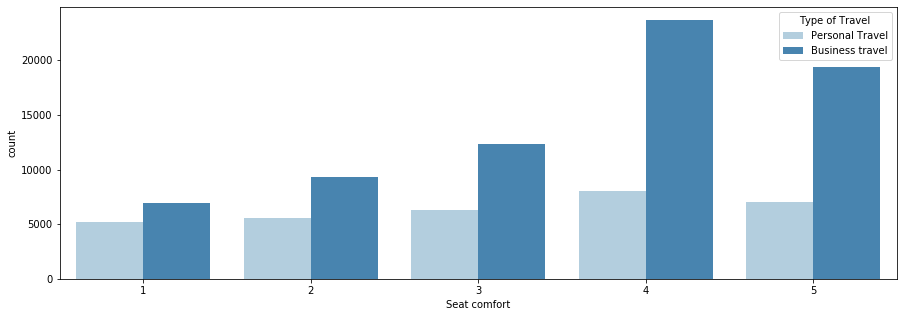

In [47]:
sns.countplot(data=DF,x='Seat comfort',hue='Type of Travel',palette='Blues')
figsize(15,5)

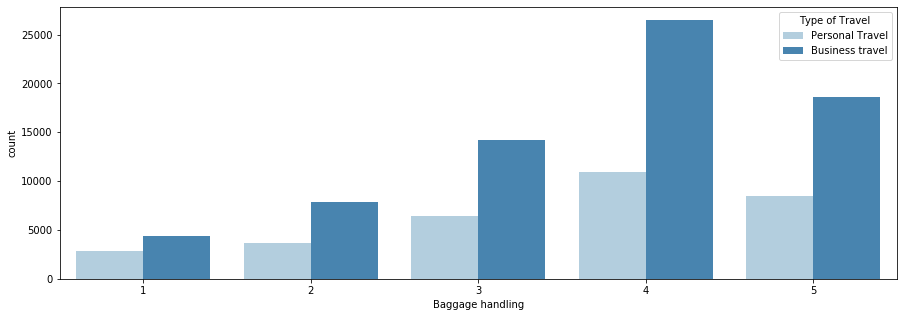

In [50]:
sns.countplot(data=DF,x='Baggage handling',hue='Type of Travel',palette='Blues')
figsize(15,5)

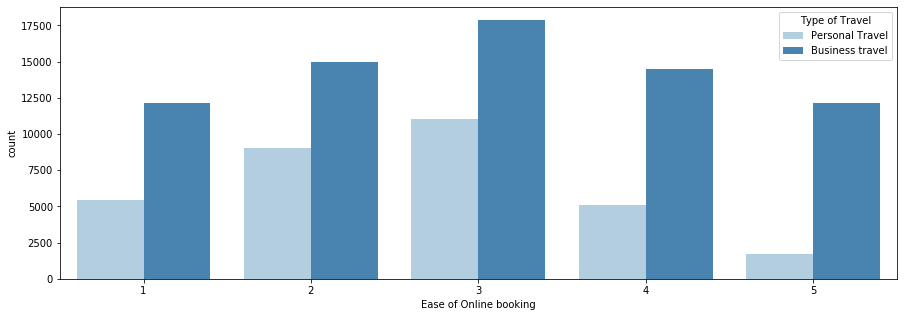

In [45]:
sns.countplot(data=DF,x='Ease of Online booking',hue='Type of Travel',palette='Blues')
figsize(15,5)

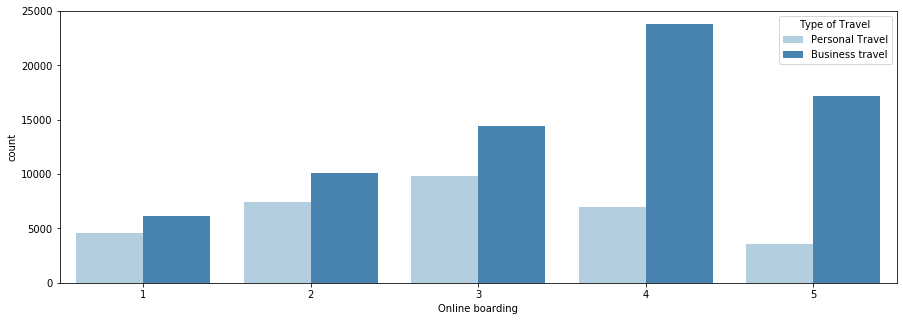

In [48]:
sns.countplot(data=DF,x='Online boarding',hue='Type of Travel',palette='Blues')
figsize(15,5)

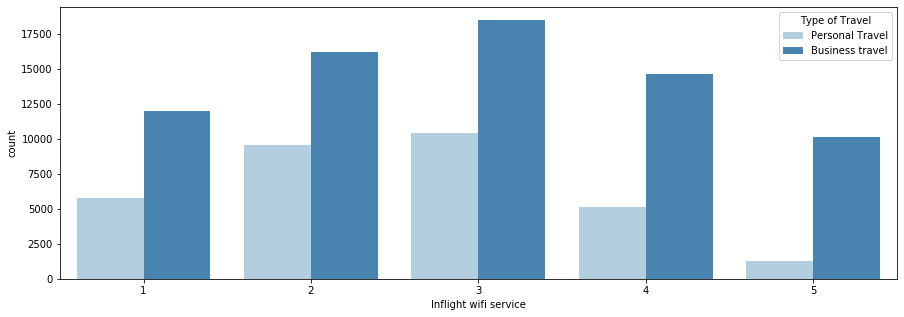

In [46]:
sns.countplot(data=DF,x='Inflight wifi service',hue='Type of Travel',palette='Blues')
figsize(15,5)

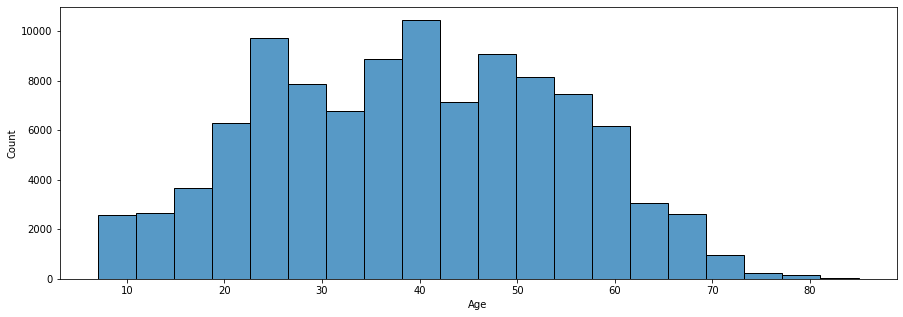

In [51]:
sns.histplot(data=DF,x='Age',bins=20)

In [52]:
def AgeCategory(age):
    if age in range(0,21):
        return 1
    elif age in range(21,31):
        return 2
    elif age in range(31,41):
        return 3
    elif age in range(41,51):
        return 4
    elif age in range(51,61):
        return 5
    elif age in range(61,71):
        return 6
    else:
        return 7

In [53]:
DF['Age_category']=DF['Age'].apply(AgeCategory)

In [54]:
DF['Age_category'].isna().sum()

0

In [55]:
DF['Age_category'].dtype

dtype('int64')

#### Age categories:
1 [<=20]

2 [21-30]

3 [31-40]

4 [41-50]

5 [51-60]

6 [61-70]

7 [71<]

### Majority from age category 1 and 6 are Loyal clients, Economy class, traveling for personal reasons and most of them are dissatisfied
### Majority from age category 2 are Loyal clients, Economy class, traveling for business reasons and most of them are dissatisfied
### Majority from age category 3 and 7 are Loyal, Business class,  traveling for business reasons and most of them are dissatisfied
### Majority from age category 4 and 5 are Loyal, Business Class, traveling for business reasons and satisfied


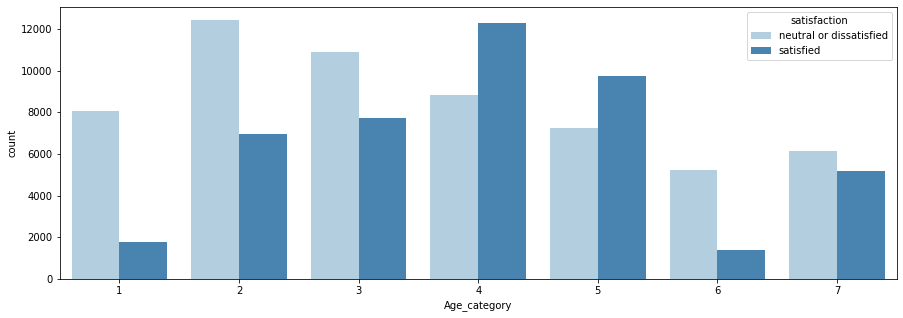

In [56]:
sns.countplot(data=DF,x='Age_category',hue='satisfaction',palette='Blues')

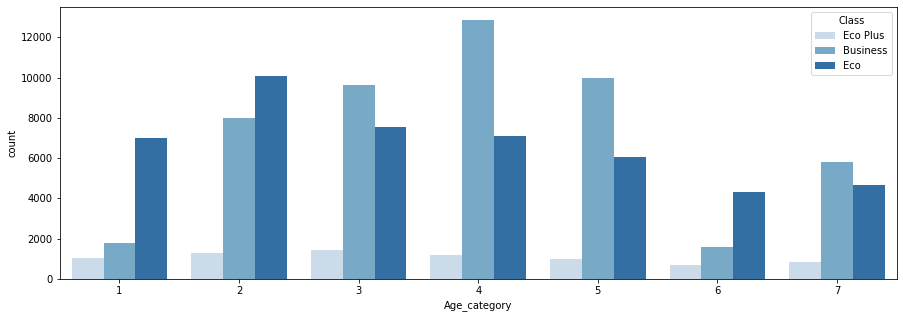

In [57]:
sns.countplot(data=DF,x='Age_category',hue='Class',palette='Blues')

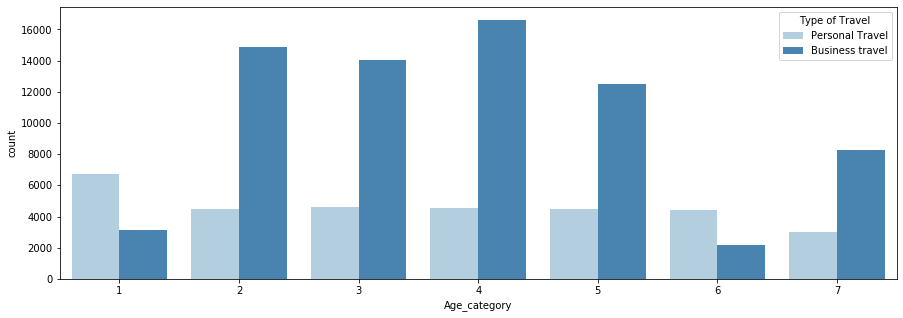

In [58]:
sns.countplot(data=DF,x='Age_category',hue='Type of Travel',palette='Blues')

### Most of the disloyal passengers are from age category 2 [21=>30]
### Most of the loyal passengers are in from age category 4 and 5 [41=>60]

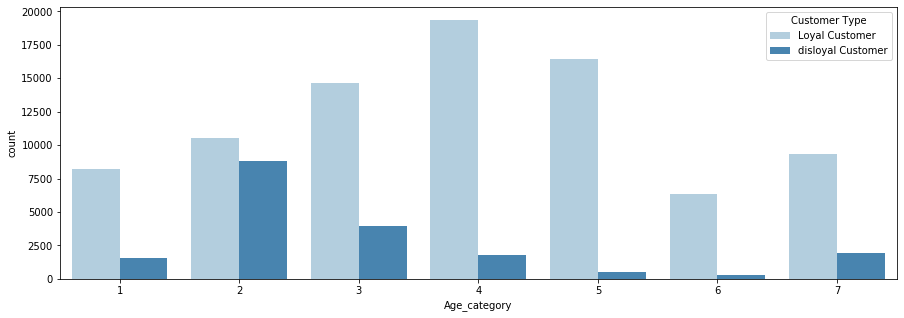

In [59]:
sns.countplot(data=DF,x='Age_category',hue='Customer Type',palette='Blues')

In [60]:
DF['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

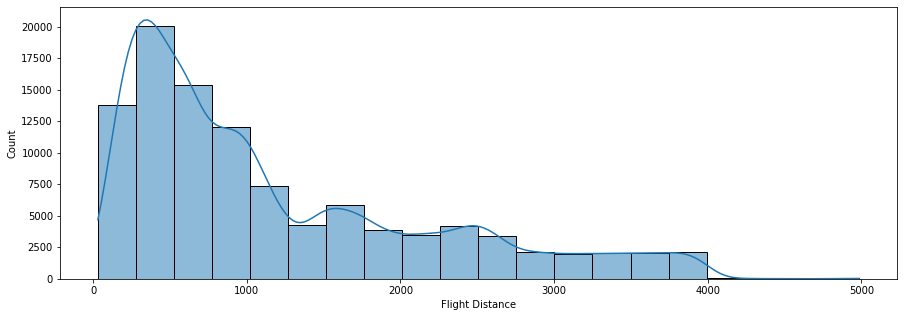

In [61]:
sns.histplot(data=DF, x='Flight Distance', bins=20,kde=True)

###  The passengers are more satisfied in longer flight trips

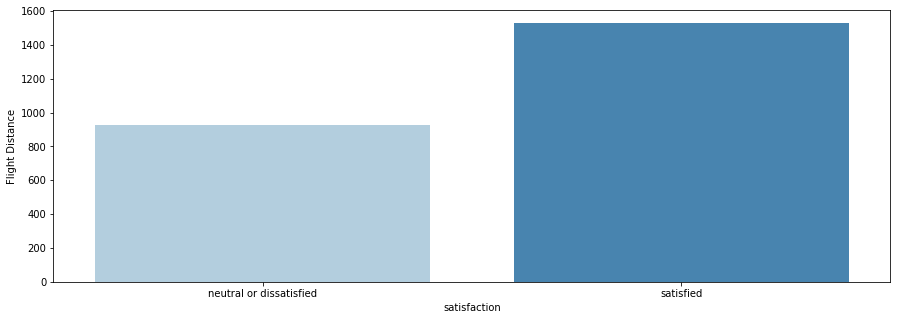

In [62]:
sns.barplot(data=DF,x= 'satisfaction', y='Flight Distance',ci=None,palette='Blues' )

### Passengers choose business class in longer trips

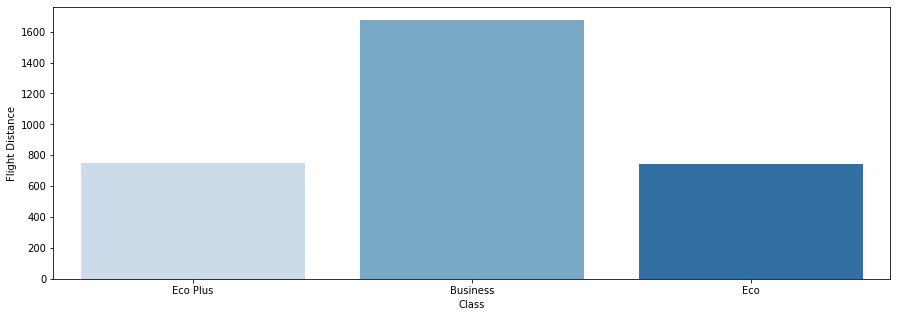

In [63]:
sns.barplot(data=DF,x= 'Class', y='Flight Distance',ci=None,palette='Blues' )

### It is clear there is a problem with online boarding in short trips

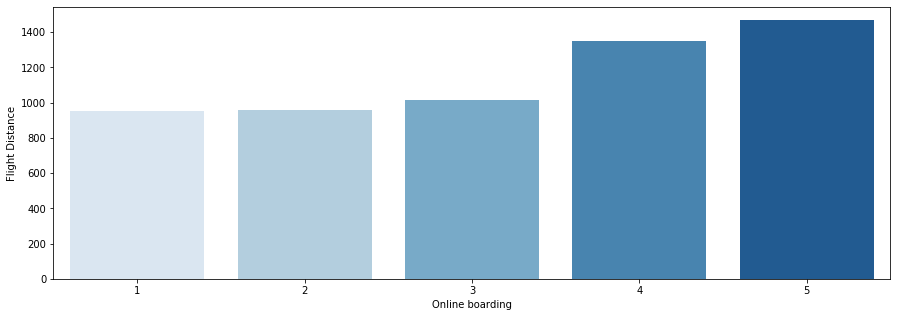

In [64]:
sns.barplot(data=DF,x= 'Online boarding', y='Flight Distance',ci=None,palette='Blues' )

### In longer trips passengers give lower rating for departure arrival time convenient  

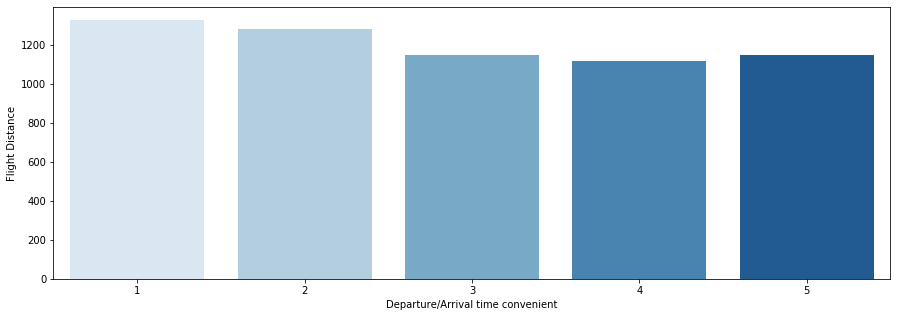

In [65]:
sns.barplot(data=DF,x= 'Departure/Arrival time convenient', y='Flight Distance',ci=None,palette='Blues' )

### Rating of seat comfort is better in longer trips

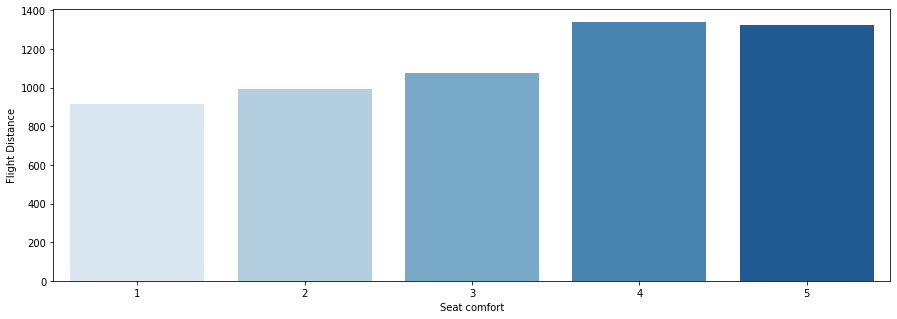

In [66]:
sns.barplot(data=DF,x= 'Seat comfort', y='Flight Distance',ci=None,palette='Blues' )

### Inflight entertainment is better in longer trips

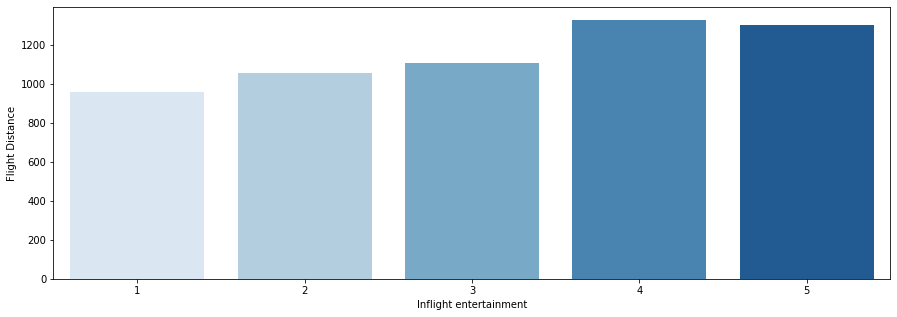

In [67]:
sns.barplot(data=DF,x= 'Inflight entertainment', y='Flight Distance',ci=None,palette='Blues' )

### Fill in nulls with median

In [68]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
DF['Arrival Delay in Minutes']=median_imputer.fit_transform(DF[['Arrival Delay in Minutes']])

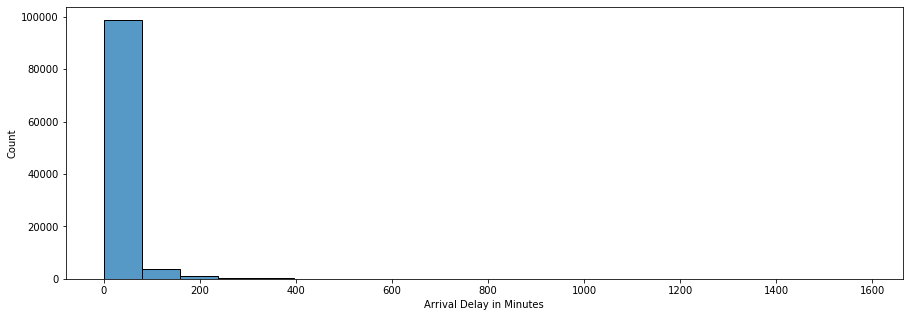

In [69]:
sns.histplot(data=DF, x='Arrival Delay in Minutes', bins=20)

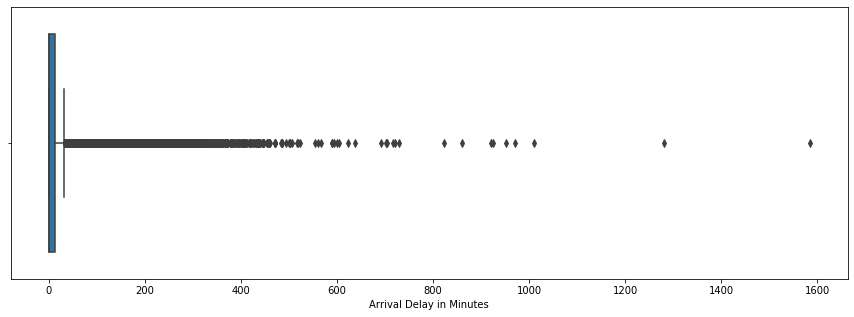

In [70]:
sns.boxplot(data=DF, x='Arrival Delay in Minutes')

### The more the arrival delay the more dissatisfied the passengers are

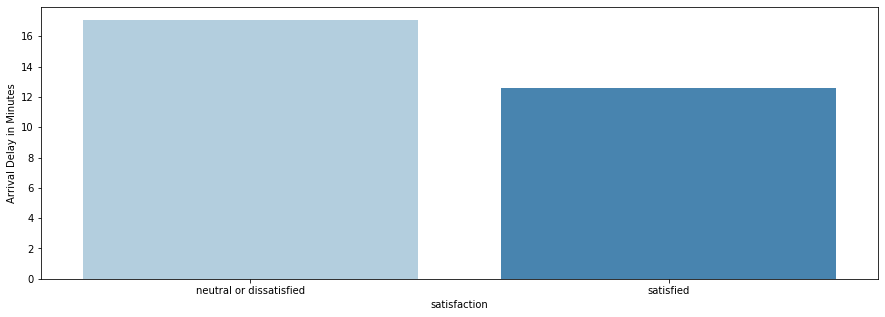

In [71]:
sns.barplot(data=DF,x= 'satisfaction', y='Arrival Delay in Minutes',ci=None,palette='Blues' )

### Logically the same goes for Departure delay as well

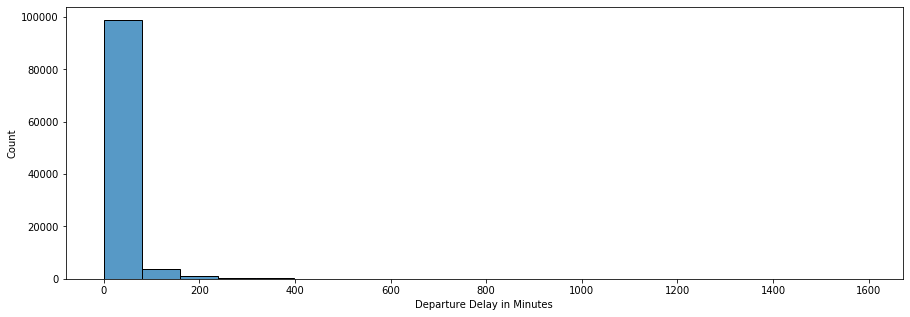

In [72]:
sns.histplot(data=DF, x='Departure Delay in Minutes', bins=20)

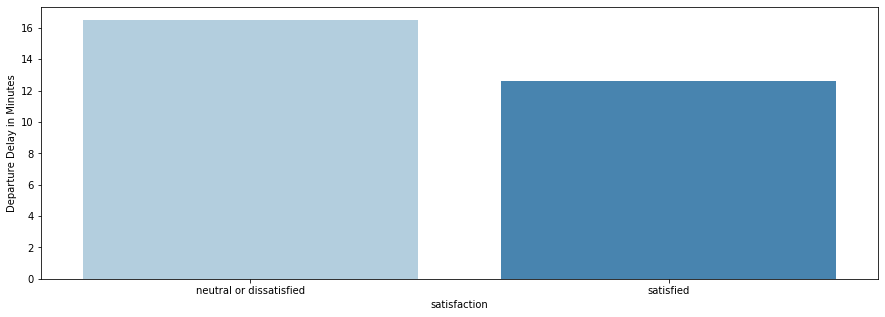

In [73]:
sns.barplot(data=DF,x= 'satisfaction', y='Departure Delay in Minutes',ci=None,palette='Blues' )

# 3. Adjusting the data 

In [74]:
def customerType(customer):
    if customer =='Loyal Customer':
        return 1
    else:
        return 0

In [75]:
DF['CustomerType']=DF['Customer Type'].apply(customerType)

In [101]:
def classcategory(customerclass):
    if customerclass =='Business':
        return 1
    elif customerclass =='Eco':
        return 2
    else:
        return 0

In [103]:
DF['Class_new']=DF['Class'].apply(classcategory)

In [78]:
def satisfaction1(x):
    if x =='neutral or dissatisfied':
        return 0
    else:
        return 1


In [79]:
DF['Satisfaction']=DF['satisfaction'].apply(satisfaction1)

In [80]:
DF['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [81]:
def TypeofTravel(traveltype):
    if traveltype =='Business travel':
        return 1
    else:
        return 0

In [82]:
DF['Type of travel']=DF['Type of Travel'].apply(TypeofTravel)

In [84]:
DF.corr()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Age_category,CustomerType,Class_new,Satisfaction,Type of travel
Flight Distance,1.000000,0.011059,-0.069515,0.050371,0.004812,0.057384,0.198120,0.157316,0.128806,0.109570,...,0.063184,0.073052,0.057584,0.093140,0.002158,0.084182,0.225200,-0.274786,0.298780,0.267344
Inflight wifi service,0.011059,1.000000,0.372061,0.676685,0.351959,0.141504,0.459276,0.136467,0.210564,0.125138,...,0.116827,0.061859,0.106559,0.145950,-0.026211,0.013824,0.000476,-0.052404,0.386983,0.128354
Departure/Arrival time convenient,-0.069515,0.372061,1.000000,0.500083,0.493056,-0.003701,0.057712,-0.006232,-0.029299,0.079130,...,0.081195,0.120236,0.081857,0.007453,-0.005297,-0.009333,0.106332,0.080662,-0.048621,-0.257408
Ease of Online booking,0.050371,0.676685,0.500083,1.000000,0.496735,0.027931,0.364500,0.029971,0.032728,0.033597,...,0.026685,0.022970,0.026056,0.016528,-0.012019,0.014888,0.019284,-0.077925,0.236529,0.126688
Gate location,0.004812,0.351959,0.493056,0.496735,1.000000,-0.001499,-0.003018,0.003713,0.003552,-0.028347,...,0.002263,-0.035399,0.001708,-0.003780,0.005458,-0.001208,-0.006068,-0.001978,0.000708,0.030716
Food and drink,0.057384,0.141504,-0.003701,0.027931,-0.001499,1.000000,0.246993,0.575448,0.623981,0.058976,...,0.035060,0.086878,0.033652,0.658800,-0.023141,0.020826,0.059381,-0.056905,0.210724,0.062744
Online boarding,0.198120,0.459276,0.057712,0.364500,-0.003018,0.246993,1.000000,0.434950,0.294707,0.166344,...,0.093395,0.223560,0.086461,0.347582,-0.028843,0.152880,0.181401,-0.204993,0.556092,0.213053
Seat comfort,0.157316,0.136467,-0.006232,0.029971,0.003713,0.575448,0.434950,1.000000,0.610794,0.131994,...,0.074532,0.191802,0.069174,0.678657,-0.027793,0.129694,0.159499,-0.143764,0.349451,0.124418
Inflight entertainment,0.128806,0.210564,-0.029299,0.032728,0.003552,0.623981,0.294707,0.610794,1.000000,0.420095,...,0.378244,0.120809,0.404804,0.691707,-0.027555,0.062327,0.110120,-0.123720,0.397963,0.148465
On-board service,0.109570,0.125138,0.079130,0.033597,-0.028347,0.058976,0.166344,0.131994,0.420095,1.000000,...,0.519092,0.243941,0.550680,0.123200,-0.031598,0.042367,0.056598,-0.118182,0.322355,0.056594


#### since there is a great correlation between arrival delay and departure delay, I decided to drop arrival delay
and since i can't get any useful insight from gender, id and unnamed:0 columns, I decided to drop them as well

In [83]:
DF=DF.drop(['Unnamed: 0', 'id','Age','Gender','Customer Type','Class','satisfaction','Type of Travel','Arrival Delay in Minutes'],axis=1)

### No abnormal outliers detected 

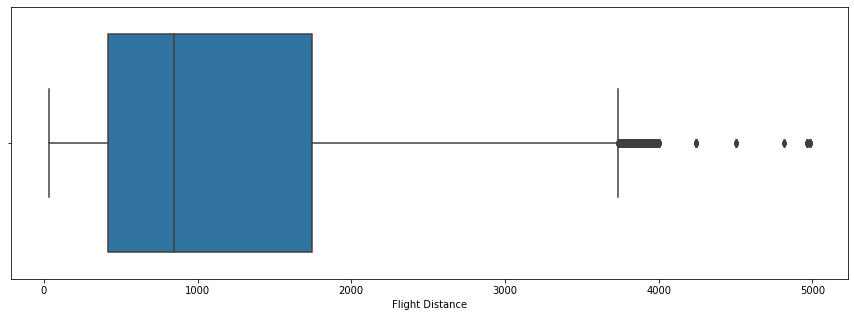

In [85]:
sns.boxplot(data=DF, x='Flight Distance')

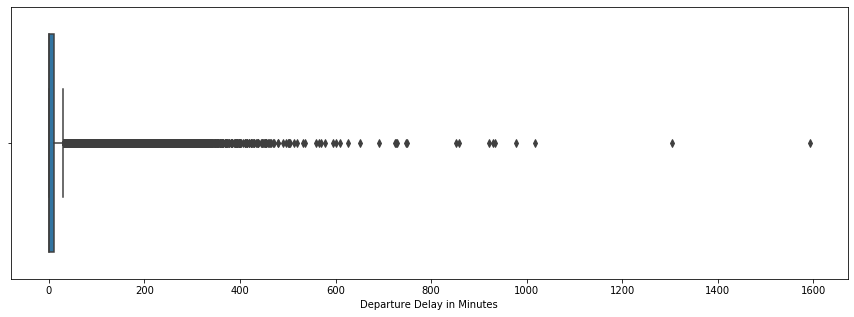

In [86]:
sns.boxplot(data=DF, x='Departure Delay in Minutes')

In [87]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#columns=['Flight Distance','Departure Delay in Minutes']

#DF[columns]=scaler.fit_transform(DF[columns])

In [88]:
#scaler.transform([[4000,45]])

In [89]:
DF.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Age_category,CustomerType,Class_new,Satisfaction,Type of travel
0,460,3,4,3,1,5,3,5,5,4,...,4,4,5,5,25,1,1,0,0,0
1,235,3,2,3,3,1,3,1,1,1,...,3,1,4,1,1,2,0,1,0,1
2,1142,2,2,2,2,5,5,5,5,4,...,4,4,4,5,0,2,1,1,1,1
3,562,2,5,5,5,2,2,2,2,2,...,3,1,4,2,11,2,1,1,0,1
4,214,3,3,3,3,4,5,5,3,3,...,4,3,3,3,0,6,1,1,1,1


# 4.Split

In [90]:
features=DF.drop(columns=['Satisfaction'])

In [91]:
Target=DF['Satisfaction']

In [92]:
DF.columns

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Age_category',
       'CustomerType', 'Class_new', 'Satisfaction', 'Type of travel'],
      dtype='object')

# 5.Cross validation [Logistic Regression/ Decision Tree/ Random Forest/ KNN]

### Logistic Regression

In [273]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.model_selection import cross_validate
cv_results4 = cross_validate(lg, features, Target, cv = 10, 
                            scoring = ('accuracy', 'recall', 'precision'))

In [662]:
cv_results4['test_accuracy'].mean()

0.8826128185817129

In [663]:
cv_results4['test_recall'].mean()

0.8583675693572369

In [664]:
cv_results4['test_precision'].mean()

0.8691408648854022

### Decision Tree

In [657]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.model_selection import cross_validate

In [658]:
cv_results = cross_validate(dtc, features, Target, cv = 10, 
                            scoring = ('accuracy', 'recall', 'precision'))

In [659]:
cv_results['test_accuracy'].mean()

0.922553477601341

In [660]:
cv_results['test_recall'].mean()

0.9160907684526027

In [661]:
cv_results['test_precision'].mean()

0.9062090465410899

### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.model_selection import cross_validate

In [95]:
cv_results2 = cross_validate(rfc, features, Target, cv = 10, 
                            scoring = ('accuracy', 'recall', 'precision'), return_train_score=True)
cv_results2

{'fit_time': array([14.74242592, 12.32782149, 11.04481912, 10.20121789, 10.20241809,
        19.60803413, 22.50823951, 23.56104159, 22.1252389 , 22.01043868]),
 'score_time': array([0.32760048, 0.28080058, 0.24960065, 0.24960041, 0.24960017,
        0.43680072, 0.4574008 , 0.45240068, 0.51480079, 0.31200051]),
 'test_accuracy': array([0.94976422, 0.94793571, 0.94697334, 0.94880185, 0.94513956,
        0.94590953, 0.95293551, 0.94831569, 0.94985563, 0.95235804]),
 'train_accuracy': array([0.99997861, 1.        , 1.        , 0.99998931, 0.99998931,
        0.99998931, 0.99998931, 0.99998931, 0.99998931, 0.99997861]),
 'test_recall': array([0.9140573 , 0.9053964 , 0.90894959, 0.91117033, 0.90493114,
        0.90715238, 0.91403821, 0.90559751, 0.91314971, 0.91783256]),
 'train_recall': array([0.99995064, 1.        , 1.        , 0.99997532, 0.99997532,
        0.99997532, 0.99997532, 0.99997532, 0.99997532, 0.99995064]),
 'test_precision': array([0.96824277, 0.97256679, 0.96669816, 0.968831

In [99]:
cv_results2['train_accuracy'].mean()

0.9999893063797065

In [100]:
cv_results2['test_accuracy'].mean()

0.9487989078428999

In [654]:
cv_results2['test_accuracy'].mean()

0.9487219477801967

In [655]:
cv_results2['test_recall'].mean()

0.9100943563662035

In [656]:
cv_results2['test_precision'].mean()

0.9697130028726934

### KNN 

In [665]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
from sklearn.model_selection import cross_validate

In [666]:
cv_results3 = cross_validate(KNN, features, Target, cv = 10, 
                            scoring = ('accuracy', 'recall', 'precision'))

In [667]:
cv_results3['test_accuracy'].mean()

0.8000365969699292

In [668]:
cv_results3['test_recall'].mean()

0.7432539124664705

In [669]:
cv_results3['test_precision'].mean()

0.7840790265254185

# 6.Hyper parameter Tuning
### Randomized Search
### Random Forest model

In [671]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators' : [100,200, 250], 'max_depth' : [5,6,8,10],'criterion':['gini','entropy']}

grid_search = RandomizedSearchCV(rfc, param_distributions = params, scoring = 'accuracy', cv = 10)

grid_search.fit(features, Target)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [672]:
grid_search.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}

In [674]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [675]:
rffmodel=grid_search.best_estimator_

In [676]:
rffmodel.fit(features,Target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [559]:
import joblib

In [560]:
#joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [677]:
joblib.dump(rffmodel,'rffmodel.h5')

['rffmodel.h5']

In [106]:
features.columns

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Age_category',
       'CustomerType', 'Class_new', 'Type of travel'],
      dtype='object')

# 7.Main conclusions and recommendations

1.Passengers from business class have given higher ratings for all the services provided, compared to Eco and Eco plus.

2.Most satisfied age category is 4-5 [41-60] and they are loyal passengers.

3.The passengers are more satisfied in longer distance trips.

4.The majority of passengers who are traveling for personal reasons are dissatisfied

6.In this business case the precision is more important than recall because it is  important to correctly  predict the satisfied passengers

#Recommendations

.This airline needs strategy for ages [31-40] and [71<], since that most of them are dissatisfied although majority are business class and this is supposed to be the best service in airline.

.Most of passengers are loyal customers and majority of them are dissatisfied so basically you need good customer loyalty program [reward for loyal customers], improve their experience and listen to their feedback carefully.

.Need to improve the service for Economy class passengers ; Inflight Wifi service, ease of online booking, online boarding , inflight entertainment, etc..


